In [1]:
from datasets import load_dataset

emotions = load_dataset("emotion")

In [2]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/Users/sm/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [5]:
tokenizer.vocab_size

30522

In [6]:
tokenizer.vocab

{'haas': 22996,
 'bleak': 21657,
 '£2': 21853,
 '##erine': 24226,
 'stimuli': 22239,
 'vitamin': 17663,
 'tenants': 14665,
 'seamus': 24993,
 'hymns': 17777,
 '##tens': 25808,
 '##cious': 18436,
 'flats': 14201,
 'revenue': 6599,
 'hobart': 14005,
 '##ರ': 29937,
 'yoko': 28758,
 'rained': 28270,
 'continue': 3613,
 'crypt': 19888,
 '##tea': 27058,
 'churchill': 10888,
 'archbishop': 6507,
 'cupped': 13740,
 '##nio': 27678,
 'usage': 8192,
 '##achal': 24409,
 'habitat': 6552,
 'olympics': 3783,
 'gillian': 22358,
 'express': 4671,
 'piers': 16067,
 'opponents': 7892,
 'emerald': 14110,
 'wand': 23967,
 '##non': 8540,
 'unicef': 29073,
 '##lot': 10994,
 '##raße': 27807,
 '105': 8746,
 'invite': 13260,
 'foreign': 3097,
 'boise': 23193,
 '[unused504]': 509,
 'saigon': 24001,
 'driving': 4439,
 'qc': 25196,
 '##app': 29098,
 'omnibus': 27284,
 '№': 1578,
 'basque': 13915,
 '##heim': 8049,
 'go': 2175,
 'wehrmacht': 23443,
 'props': 24387,
 '##lized': 28931,
 'woken': 22795,
 'lair': 21039,

In [7]:
tokenizer.model_max_length

512

In [8]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [9]:
def tokenize(batch):
    return tokenizer(batch["text"], padding='max_length', truncation=True)

In [10]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=1000)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [11]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [18]:
import torch
emotions_encoded.set_format('torch', columns= ['label', 'input_ids', 'attention_mask'])

In [19]:
type(emotions_encoded['train']['input_ids'])

torch.Tensor

In [20]:
emotions_encoded['train']['input_ids'].size()

torch.Size([16000, 512])

In [21]:
for id in emotions_encoded['train']['input_ids'][:2]:
    print(id)


tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [22]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [23]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [24]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [25]:
def extract_hidden_states(batch):
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [26]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [27]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [28]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [29]:
emotions_hidden['train']['hidden_state'].size()

torch.Size([16000, 768])

In [30]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [31]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6345

In [32]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [33]:
labels = emotions['train'].features['label']
labels

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

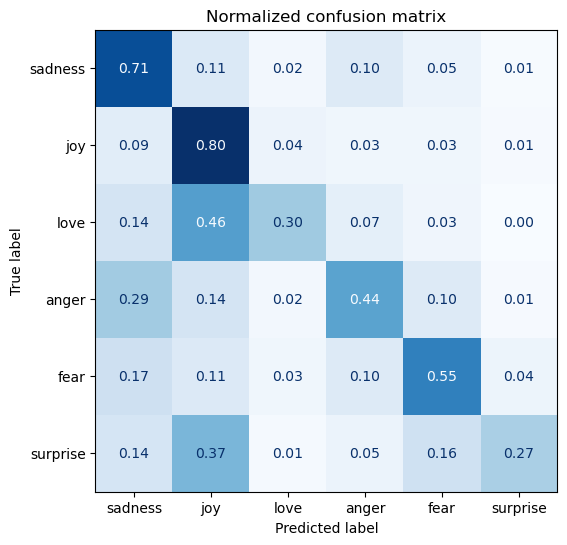

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

labels = emotions['train'].features['label'].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [35]:
confusion_matrix(y_valid, y_preds, normalize="true")

array([[0.71090909, 0.11090909, 0.02      , 0.10363636, 0.04909091,
        0.00545455],
       [0.08664773, 0.80255682, 0.04403409, 0.02840909, 0.03125   ,
        0.00710227],
       [0.14044944, 0.45505618, 0.29775281, 0.07303371, 0.03370787,
        0.        ],
       [0.29090909, 0.13818182, 0.02181818, 0.44      , 0.10181818,
        0.00727273],
       [0.16509434, 0.10849057, 0.02830189, 0.10377358, 0.55188679,
        0.04245283],
       [0.13580247, 0.37037037, 0.01234568, 0.04938272, 0.16049383,
        0.27160494]])

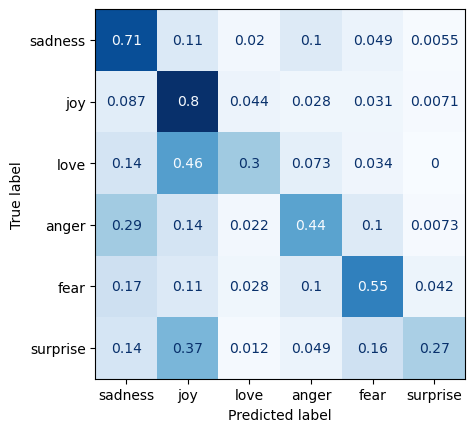

In [36]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_valid, y_preds, normalize="true"), display_labels=labels).plot(cmap='Blues', colorbar=False)
plt.show()

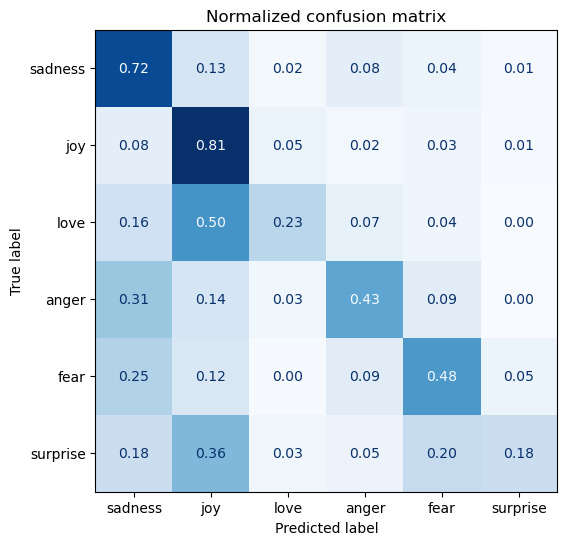

In [37]:
X_test = np.array(emotions_hidden["test"]["hidden_state"])
y_test= np.array(emotions_hidden["test"]["label"])

y_preds = lr_clf.predict(X_test)
plot_confusion_matrix(y_preds, y_test, labels)